In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log_less.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[7:].strip()
            ##Author
            line = lines[i+1]
            if line[:6] == "Merge:":
                i = i + 1
                line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            ##print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
....

IndexError: list index out of range

In [5]:
df.head()

,author,date,activity,text,files
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in..."
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,..."
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...


In [6]:
len(df)

2662

In [7]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [8]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [9]:
del df['changes']
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1,1,1
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17,195,87
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1,11,6
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1,13,NaN
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5,22,6


In [10]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [11]:
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1.0,1.0,1.0
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17.0,195.0,87.0
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1.0,11.0,6.0
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1.0,13.0,NaN
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5.0,22.0,6.0


In [12]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [13]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1.0,1.0,1.0,0,0,0,0
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17.0,195.0,87.0,0,0,0,0
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1.0,11.0,6.0,0,0,0,0
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1.0,13.0,NaN,0,0,0,0
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5.0,22.0,6.0,0,0,0,0


In [14]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1.0,1.0,1.0,1,2,0,2
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17.0,195.0,87.0,14,18,0,18
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1.0,11.0,6.0,1,2,0,2
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1.0,13.0,NaN,1,2,0,2
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5.0,22.0,6.0,4,6,0,6


In [15]:
df.insertions.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     2227.000000
mean       234.279300
std       1863.801305
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max      53238.000000
Name: insertions, dtype: float64

In [16]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [17]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [18]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [19]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1.0,1.0,1.0,1,2,0,2,0,0,0,0
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17.0,195.0,87.0,14,18,0,18,0,0,1,0
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1.0,11.0,6.0,1,2,0,2,0,0,0,0
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1.0,13.0,NaN,1,2,0,2,0,0,0,0
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5.0,22.0,6.0,4,6,0,6,0,0,0,0


In [20]:
from textblob import TextBlob

In [21]:
df['subjectivity'] = 0
df['polarity'] = 0

In [22]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
ff5760e0994fd1ecc45bf50c242eaece9f109603,matthewdean.me@gmail.com,Wed Jan 11 02:46:25 2017,v3.0.0-alpha.2,v3.0.0-alpha.2\n,"[ package.json | 2 +-\n, 1 file changed, 1 in...",1.0,1.0,1.0,1,2,0,2,0,0,0,0,0,0
b782411278a4916bec6ceaa4f6bb5cb56fd07620,matthewdean.me@gmail.com,Wed Jan 11 02:44:50 2017,Sync default options across all Less.js enviro...,Sync default options across all Less.js en...,[ bin/lessc | 28 +...,17.0,195.0,87.0,14,18,0,18,0,0,1,0,0,0
1736ea5c37036903ae5ceed71f3f0771f84772db,matthewdean.me@gmail.com,Mon Jan 9 16:34:31 2017,Update plugin API,Update plugin API\n,[ lib/less/plugin-api.js | 17 +++++++++++-----...,1.0,11.0,6.0,1,2,0,2,0,0,0,0,0,0
8ba8c00a4209f1726193b91faa725dd55c9323cd,matthewdean.me@gmail.com,Mon Jan 9 16:12:46 2017,Add UMD plugin format,Add UMD plugin format\n,"[ lib/less/plugin-api.js | 13 +++++++++++++\n,...",1.0,13.0,NaN,1,2,0,2,0,0,0,0,0,0
809dc509f33652d8bcef9545dbade37bc4aef02a,matthewdean.me@gmail.com,Sat Jan 7 04:39:23 2017,Arbitrary (non-falsey) values returned from fu...,Arbitrary (non-falsey) values returned fro...,[ lib/less/tree/call.js | 12 +++++...,5.0,22.0,6.0,4,6,0,6,0,0,0,0,0,0


In [23]:
df.polarity.describe()

count    2662.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: polarity, dtype: float64

In [24]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
Merge branch 'master' of https                                                                                                                   46
(dist) version bump                                                                                                                              25
Merge https                                                                                                                                      16
Merge branch 'master' of github.com                                                                                                              16
chore(package)                                                                                                                                    7
Update CHANGELOG.md                                                                                                                               7
Update READM

In [25]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
luke.a.page@gmail.com                    1104
self@cloudhead.net                        480
alexis@cloudhead.io                       158
meri@meri.org                              95
seven.phases.max@gmail.com                 92
matthewdean.me@gmail.com                   74
alexis@cloudhead.net                       33
bass@w3masters.nl                          26
matthew-dean@users.noreply.github.com      18
r.otten@netmatch.nl                        17
marcus@synchromedia.co.uk                  17
daniels@zillow.com                         16
marcel@northdocks.com                      15
meri@sandfish.org                          15
dev@sellside.com                           15
ob@obqo.de                                 15
m.jurcovicova@gmail.com                    15
simone.deponti@gmail.com                   11
github@sellside.com                        10
dustin.cass@gmail.com                      10
deviprsd21@gmail.com                 

In [26]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
Merge branch 'master' of https,46
(dist) version bump,25
Merge https,16
Merge branch 'master' of github.com,16
chore(package),7


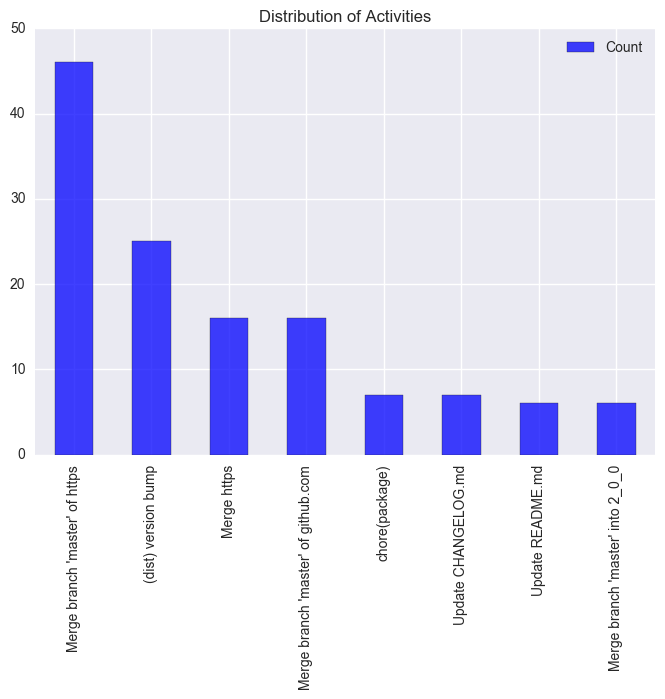

In [27]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [28]:
#####################

In [29]:
#####################

In [30]:
############################

In [31]:
dfTest = df[df.activity.isin(["Build","Tests", "Docs", "Release", "Core"])] 

In [32]:
dfTest.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dfTest['deletions'] = dfTest['deletions'].fillna('0')


In [34]:
##LEAVE THINGS ABOVE, BUT NOT RUN THEM

In [35]:
#######

In [36]:
#######

In [37]:
#######

In [38]:
#######

In [39]:
#######

In [40]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
dfTest = pd.read_csv('jQuery_Training.csv', index_col=0, encoding="utf-8")
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal.values
y = dfTest.activity.values

In [42]:
dfTest.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\r\n,"[' .github/ISSUE_TEMPLATE.md | 2 +-\n', ' 1 fi...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[' .travis.yml | 1 -\n', ' Gruntfile.js | 39...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[' test/unit/core.js | 27 ++++++++++++++++++--...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\r\n \r\n ...,[' test/node_smoke_tests/.eslintrc.json | 2 +-...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0
754e315f8a7760bcdc162712d2be7fee058fdc2,m.goleb@gmail.com,Wed Nov 30 15:32:29 2016 +0100,Build,Build: Add most of the dist folder to .esl...,"[' .eslintignore | 2 ++\n', ' 1 file changed, ...",1.0,2.0,0.0,0,2,0,2,0,0,0,1,0,0


In [43]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
y_train

array(['Build', 'Build', 'Core', 'Tests', 'Build', 'Build', 'Docs',
       'Build', 'Tests', 'Build', 'Tests', 'Build', 'Tests', 'Tests',
       'Build', 'Docs', 'Build', 'Build', 'Build', 'Tests', 'Tests',
       'Build', 'Tests', 'Tests', 'Build', 'Tests', 'Build', 'Docs',
       'Docs', 'Build', 'Build', 'Tests', 'Build', 'Build', 'Build',
       'Build', 'Core', 'Release', 'Build', 'Build', 'Build', 'Build',
       'Release', 'Build', 'Core', 'Core', 'Tests', 'Build', 'Core',
       'Tests', 'Tests', 'Core', 'Build', 'Core', 'Tests', 'Tests', 'Core',
       'Build', 'Tests', 'Build', 'Build', 'Tests', 'Build', 'Core',
       'Build', 'Build', 'Release', 'Build', 'Tests', 'Build', 'Build',
       'Tests', 'Tests', 'Tests', 'Core', 'Build', 'Build', 'Build',
       'Release', 'Build', 'Release', 'Docs', 'Tests', 'Tests', 'Core',
       'Release', 'Tests', 'Release', 'Build', 'Build', 'Docs', 'Build',
       'Docs', 'Release', 'Build', 'Core', 'Build', 'Release', 'Core',
       'Build

In [44]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 78.9 percent'

In [45]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,2227.000000,2227.000000,1882.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0
mean,3.139201,234.279300,123.988842,2.322314,4.002254,0.055973,4.002254,0.021788,0.010894,0.164538,0.037190,0.015402,0.0
std,5.046186,1863.801305,2747.769566,4.106413,4.629448,0.241083,4.629448,0.155974,0.107383,0.531578,0.225505,0.123168,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,NaN,NaN,NaN,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,NaN,NaN,NaN,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,68.000000,53238.000000,104033.000000,62.000000,69.000000,2.000000,69.000000,2.000000,2.000000,11.000000,4.000000,1.000000,0.0


In [46]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0
mean,2.626221,195.995492,87.658527,2.322314,4.002254,0.055973,4.002254,0.021788,0.010894,0.164538,0.037190,0.015402,0.0
std,4.759101,1706.868048,2310.903722,4.106413,4.629448,0.241083,4.629448,0.155974,0.107383,0.531578,0.225505,0.123168,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,5.000000,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.000000,24.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,68.000000,53238.000000,104033.000000,62.000000,69.000000,2.000000,69.000000,2.000000,2.000000,11.000000,4.000000,1.000000,0.0


In [47]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [48]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
ff5760e0994fd1ecc45bf50c242eaece9f109603,1.0,1.0,1.0,1,2,0,2,0,0,0,0,0,0
b782411278a4916bec6ceaa4f6bb5cb56fd07620,17.0,195.0,87.0,14,18,0,18,0,0,1,0,0,0
1736ea5c37036903ae5ceed71f3f0771f84772db,1.0,11.0,6.0,1,2,0,2,0,0,0,0,0,0
8ba8c00a4209f1726193b91faa725dd55c9323cd,1.0,13.0,0.0,1,2,0,2,0,0,0,0,0,0
809dc509f33652d8bcef9545dbade37bc4aef02a,5.0,22.0,6.0,4,6,0,6,0,0,0,0,0,0


In [49]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [50]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0
mean,2.626221,195.995492,87.658527,2.322314,4.002254,0.055973,4.002254,0.021788,0.010894,0.164538,0.037190,0.015402,0.0
std,4.759101,1706.868048,2310.903722,4.106413,4.629448,0.241083,4.629448,0.155974,0.107383,0.531578,0.225505,0.123168,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,5.000000,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.000000,24.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,68.000000,53238.000000,104033.000000,62.000000,69.000000,2.000000,69.000000,2.000000,2.000000,11.000000,4.000000,1.000000,0.0


In [51]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
Core,2279
Tests,274
Build,79
Docs,27
Release,3


In [52]:
dfComplete[["activity", "predicted"]]

,activity,predicted
ff5760e0994fd1ecc45bf50c242eaece9f109603,v3.0.0-alpha.2,Core
b782411278a4916bec6ceaa4f6bb5cb56fd07620,Sync default options across all Less.js enviro...,Tests
1736ea5c37036903ae5ceed71f3f0771f84772db,Update plugin API,Core
8ba8c00a4209f1726193b91faa725dd55c9323cd,Add UMD plugin format,Core
809dc509f33652d8bcef9545dbade37bc4aef02a,Arbitrary (non-falsey) values returned from fu...,Core
ede0587368bc8005bdf400d958d9d26fae3799f0,Revert contrast changes in 2.7.1,Core
c60c3225624da08cfa6937651a3160ef0ced5ba1,3.0.0-alpha.1,Core
68ea31dc89c60efc403089a96f84fc97a2b2d945,Line and column # reporting for Node errors,Core
43ab0b872248ec34186bd8c245904d9a0f5d7825,Added error test for unparseable `@plugin` wit...,Tests
49cbe520f6b38b4b8797dcba491501c0c461c7f5,Migrate JSCS and JSHint to ESLint and fix vari...,Core


In [53]:
dfTest2 = pd.read_csv('nodejs_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,activity,predicted,predicted2
ff5760e0994fd1ecc45bf50c242eaece9f109603,v3.0.0-alpha.2,Core,src
b782411278a4916bec6ceaa4f6bb5cb56fd07620,Sync default options across all Less.js enviro...,Tests,test
1736ea5c37036903ae5ceed71f3f0771f84772db,Update plugin API,Core,src
8ba8c00a4209f1726193b91faa725dd55c9323cd,Add UMD plugin format,Core,src
809dc509f33652d8bcef9545dbade37bc4aef02a,Arbitrary (non-falsey) values returned from fu...,Core,src
ede0587368bc8005bdf400d958d9d26fae3799f0,Revert contrast changes in 2.7.1,Core,src
c60c3225624da08cfa6937651a3160ef0ced5ba1,3.0.0-alpha.1,Core,src
68ea31dc89c60efc403089a96f84fc97a2b2d945,Line and column # reporting for Node errors,Core,src
43ab0b872248ec34186bd8c245904d9a0f5d7825,Added error test for unparseable `@plugin` wit...,Tests,test
49cbe520f6b38b4b8797dcba491501c0c461c7f5,Migrate JSCS and JSHint to ESLint and fix vari...,Core,src


In [54]:
dfComplete[["activity", "predicted", "predicted2"]].sample(100).to_csv('less100.csv', encoding="utf-8")

In [55]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print("F1 score")
    print(2*correct/((2*correct) + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")
accuracy_dist("CORE",  "Core", "src", dfComplete)
accuracy_dist("BUILD", "Build", "build", dfComplete)
accuracy_dist("DOCS",  "Docs", "doc", dfComplete)
accuracy_dist("TEST", "Tests", "test",  dfComplete)

----
CORE
F1 score
0.9650067294751009
Same
2151
Different
156
----
----
BUILD
F1 score
0.9875
Same
79
Different
2
----
----
DOCS
F1 score
0.9433962264150944
Same
25
Different
3
----
----
TEST
F1 score
0.8052805280528053
Same
244
Different
118
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [110]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

In [ ]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [ ]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



In [ ]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()